### Flight Fare Prediction

Aim of these project is to predict the Flight Fare based on various features

### Dataset

https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/


## Life cycle for Data Science Project

1. Data Gathering
2. Exploratory Data Analysis 
3. Feature Engineering 
4. Feature Selection
5. Model Building
6. Model Deployment

------------------


### Import libraries

In [1]:
!pip install catboost

     |████████████████████████████████| 65.8MB 55kB/s 


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import  XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingRegressor

### 1. Data Gathering 


In [4]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Exploratory Data Analysis 

EDA is Done to find out following :
1. Missing values
2. Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Each Independent and Dependent Feature

##### Missing Values 

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since there are 1 missing value in Route and Total shops , We will drop that Rows from the dataset

In [8]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Numerical Variables --- From above analysis we can see that datatype of all varaibles are Object Type.

We need to do Feature Engineering for all above features to convert it into Variables (Discrete/Continous)

#### Temporal Variables 

Date of Journey and arrival time can be seen in form of datetime varaibles. We will extract more information from that in Feature Engineering.

Here we will check the relationship between Date of Journey and Price

In [9]:
train_data.groupby('Date_of_Journey')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Date_of_Journey,,,,,,,,
01/03/2019,152.0,21885.861842,10341.590454,7744.0,13541.75,22270.0,26890.00,79512.0
03/03/2019,97.0,9322.257732,2638.253957,6135.0,6860.00,8553.0,11654.00,19508.0
06/03/2019,95.0,16750.252632,1838.462054,13502.0,15025.00,16736.0,17471.00,22270.0
09/03/2019,102.0,8118.950980,2956.183207,4259.0,6159.25,7648.0,10008.00,23001.0
1/03/2019,47.0,11859.595745,7772.635932,4622.0,6565.00,8580.0,15073.50,36983.0
1/04/2019,257.0,7448.124514,3146.129277,1965.0,4957.00,7064.0,9258.00,14151.0
1/05/2019,277.0,8692.072202,3930.288418,1965.0,4804.00,8586.0,11467.00,16704.0
1/06/2019,342.0,8987.330409,3827.190764,1965.0,5985.00,9133.5,12154.50,18804.0
12/03/2019,142.0,11607.154930,3556.067541,4049.0,11087.00,12014.0,13817.00,23843.0


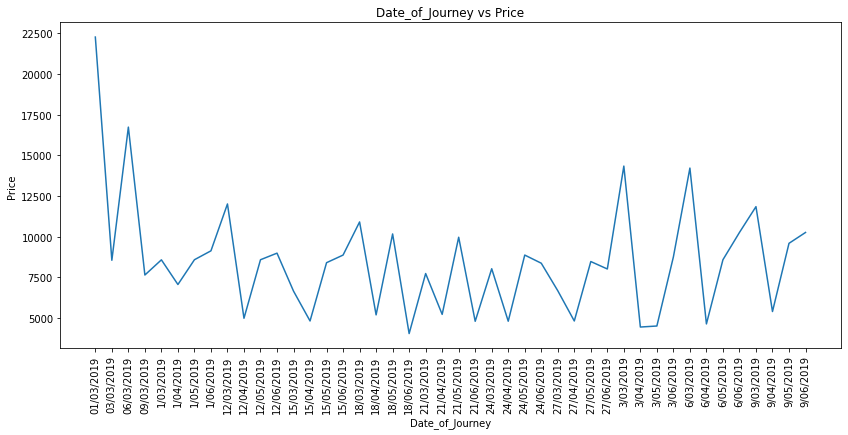

In [17]:
fig = plt.figure(figsize=[14,6])
data_featm = train_data.groupby('Date_of_Journey')['Price'].median()
sns.lineplot(x=data_featm.index, y=data_featm.values)
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Date_of_Journey vs Price')
plt.show()

Dataset only contains data of only 1 year - 2019 , From above Line plot we are not able to get many insights. So now we will do feature extraction in Feature Engineering step.

##### Categorical Variables and Cardinality of Each Categorical Variables

In [21]:
categorical_features = ['Airline', 'Source', 'Destination', 'Total_Stops','Additional_Info']

### Cardinality of Categorical Variables
for feature in categorical_features:
  print('Feature : {} ------- Number of Unique Categories : {} '.format(feature,len(train_data[feature].unique())))

Feature : Airline ------- Number of Unique Categories : 12 
Feature : Source ------- Number of Unique Categories : 5 
Feature : Destination ------- Number of Unique Categories : 6 
Feature : Total_Stops ------- Number of Unique Categories : 5 
Feature : Additional_Info ------- Number of Unique Categories : 10 


We can use One Hot Encoding if it is Nominal Categorical varaible or else we can use Label Encoding if it is Ordinal Categorical Variable .

This will be decided in Feature Engineering Step

###### Relationship between categorical feature and Price

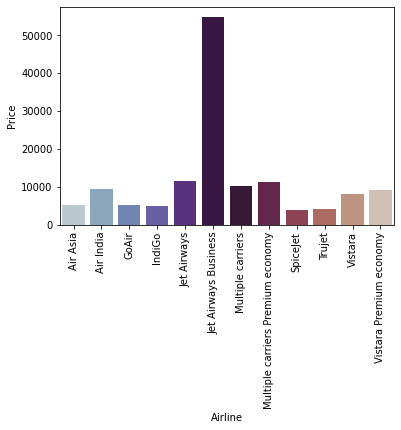

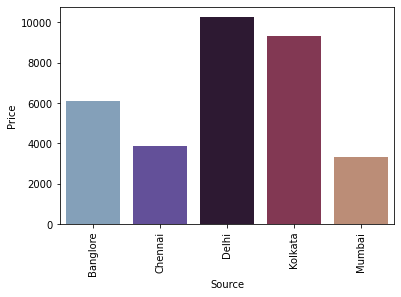

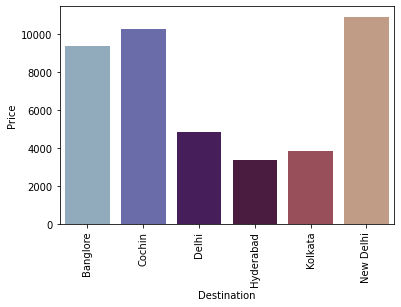

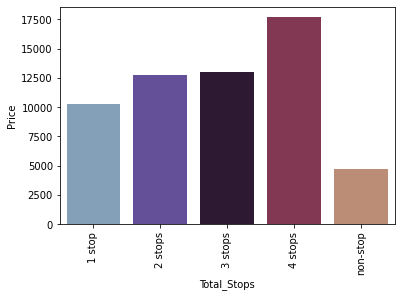

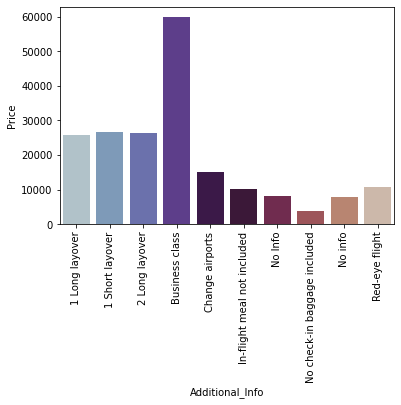

In [25]:
for feature in categorical_features:
    data_feat = train_data.groupby(feature)['Price'].median()
    sns.barplot(x=data_feat.index,  y= data_feat.values, palette='twilight')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Price')
    plt.show()

High Relationship with Price 
- Airline - Jet Airways - High Price
- Source - Delhi,Kolkata - High Price
- Destination - Banglore,Cochin,New Delhi - High Price
- Stops - 4 stops - High Price
- Additional info columns will be removed in Feature Engineering

### Feature Engineering 

Feature Extraction from multiple features

We will use pd.to_datetime() to convert object datatype to datetime datatype

In [28]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Relationship of Journey_Day and Journey_Month with Price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


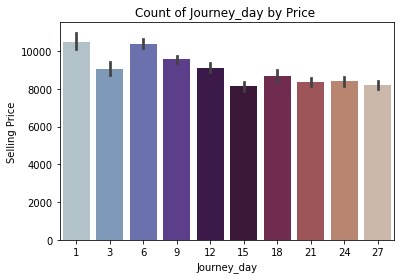

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


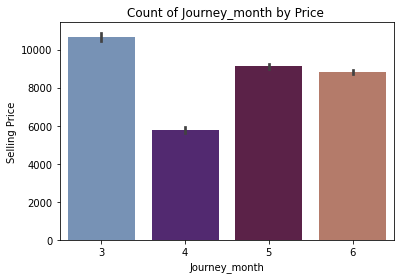

In [30]:
for feature in ['Journey_day','Journey_month']:
  sns.barplot(train_data[feature],train_data['Price'],palette='twilight')
  plt.title('Count of {} by Price '.format(feature))
  plt.xlabel(feature)
  plt.ylabel('Selling Price')
  plt.show();

In [31]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Departure Time 

Departure time is when a plane leaves the gate. 
We will extract Hours and Minutes from Departure Time Feature

In [32]:
### Extracting Hour
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
### Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Relationship of Departure Hour and Minutes with Price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


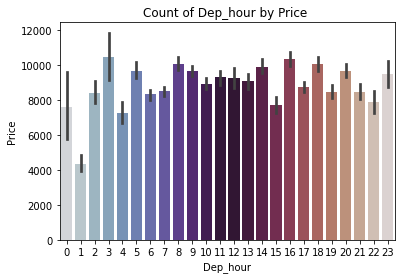

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


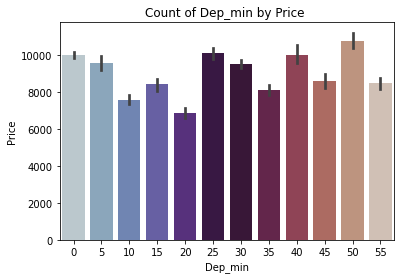

In [34]:
for feature in ['Dep_hour','Dep_min']:
  sns.barplot(train_data[feature],train_data['Price'],palette='twilight')
  plt.title('Count of {} by Price '.format(feature))
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show();

#### Arrival Time

Arrival time is when the plane pulls up to the gate.

In [35]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Relationship of Arrival Hour and Minutes with Price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


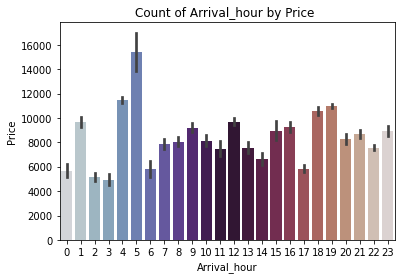

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


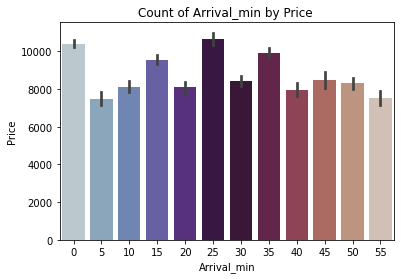

In [36]:
for feature in ['Arrival_hour','Arrival_min']:
  sns.barplot(train_data[feature],train_data['Price'],palette='twilight')
  plt.title('Count of {} by Price '.format(feature))
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show();

#### Duration

Time taken by plane to reach destination is called Duration.It is the differnce between Departure Time and Arrival time

In [37]:
train_data['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

Now first we will make all the values in same format

In [40]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration --- [-1] - Takes last value from list

In [41]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
train_data.drop(["Duration"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


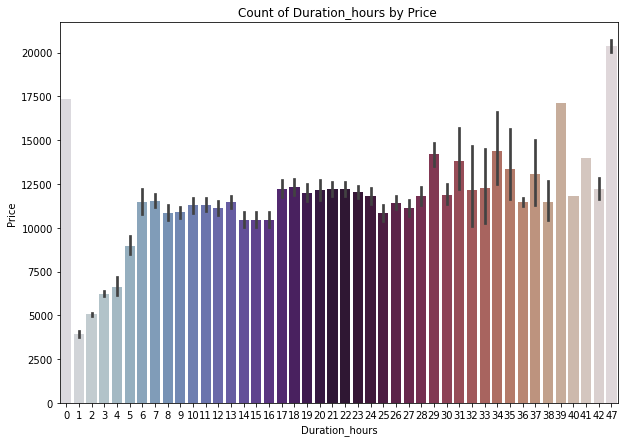

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


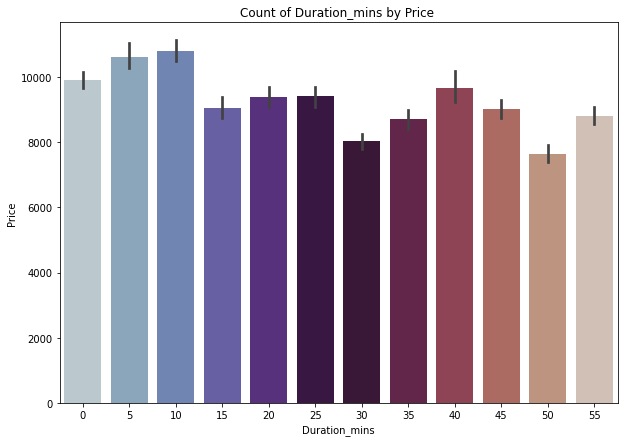

In [45]:
for feature in ['Duration_hours','Duration_mins']:
  fig = plt.figure(figsize=[10,7])
  sns.barplot(train_data[feature],train_data['Price'],palette='twilight')
  plt.title('Count of {} by Price '.format(feature))
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show();

In [46]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### Categorical Encoding

From Exploratory Data Analysis , We found that we can use One Hot Encoding for Nominal Categorical Variables , Label Encoding for Ordinal Data

Airline

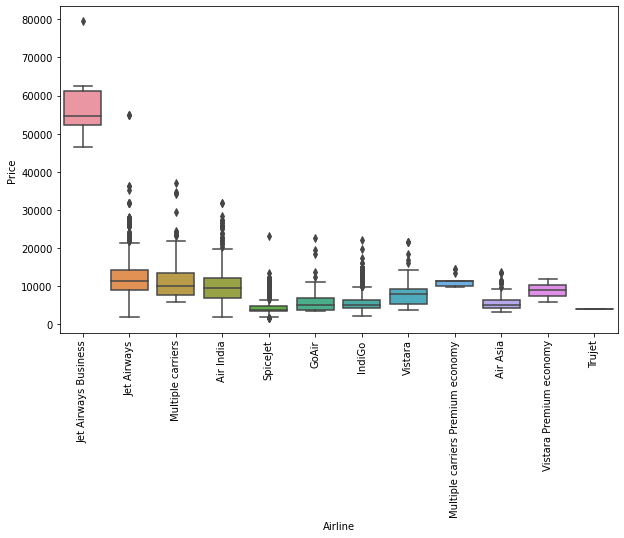

In [49]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show();

In [50]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Source

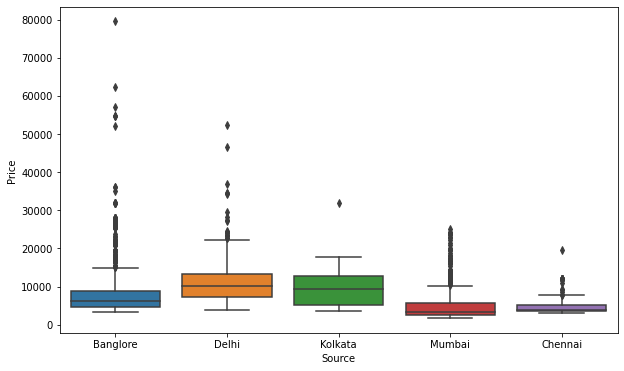

In [51]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.show();

In [52]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


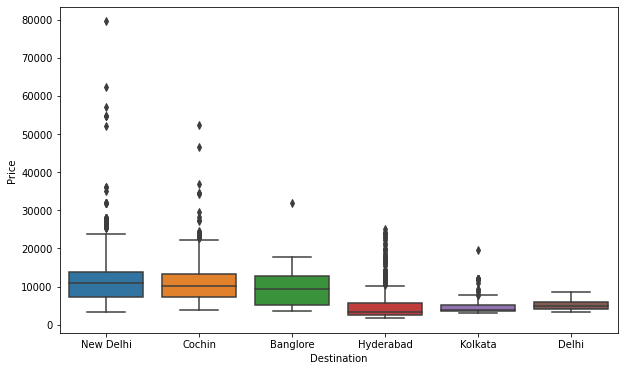

In [53]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.show();

In [54]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Total Stops

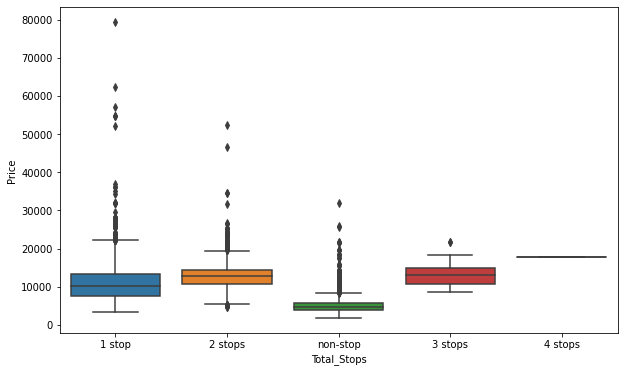

In [56]:
fig = plt.figure(figsize=[10,6])
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))
plt.show();

In [57]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [58]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
data_train.shape

(10682, 30)

### Outliers

In [60]:
dataset = data_train.copy()
dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


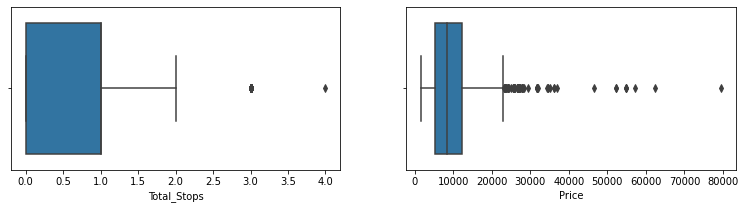

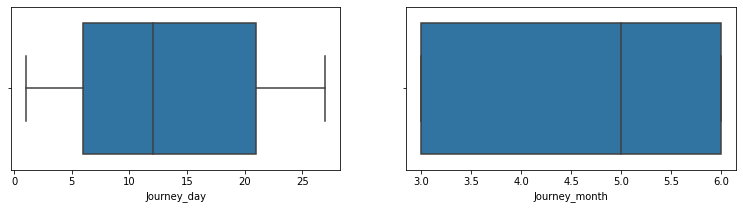

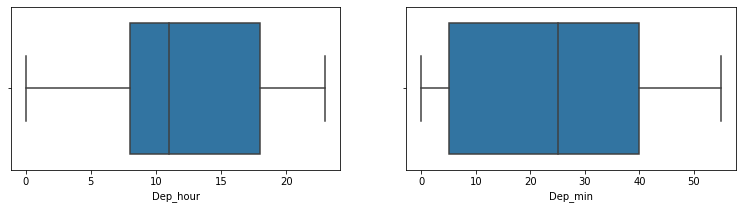

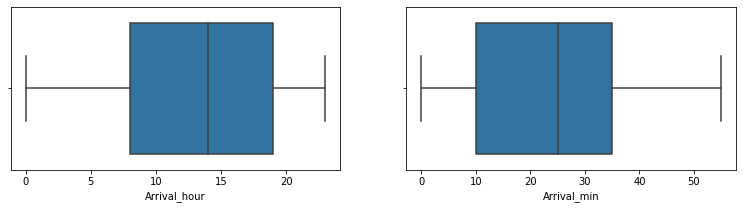

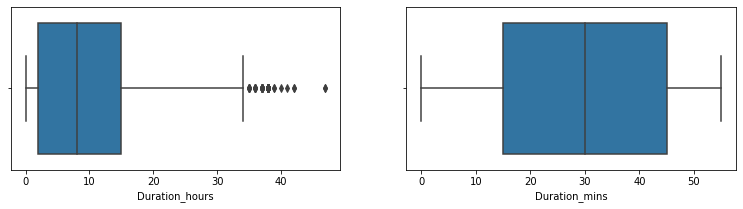

In [62]:
num_cols = ['Total_Stops','Price','Journey_day','Journey_month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins']
i=0
while i < 10:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=dataset)
    i += 1
    
    plt.show()

We will have to Analyse outliers of Total_Stops and Duration_Hours

##### Handling Outliers


Algorithms that are Sensitive/Not Sensitive to outlier:

1. Linear and Logistic Regresssion - Sensitive -- Remove
2. Decision Tree Classifier/Regressor - Not Sensitive -- Keep
3. Naive Bayes Classifier - Not Sensitive -- keep
4. SVM,Ensemble,KNN - Not Sensitive --keep

So further we will be using Linear Regression -- Remove outlier and will create a new dataframe 

For Ensemble techniques we will not remove an outlier and will train our model on original dataset

### Before Handling Outlier , We will check distribution

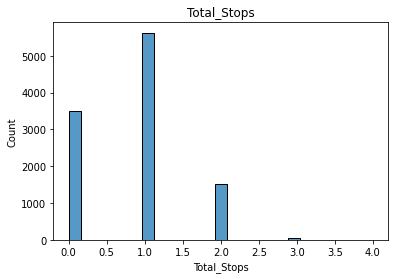

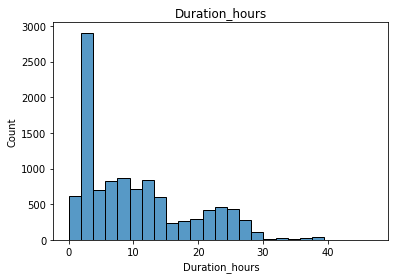

In [64]:
for feature in ['Total_Stops','Duration_hours']:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Since Data is not normally distributed in Duration_Hours , We will calculate Lower and Upper extreme values 

In [66]:
dataset_norm_reg = dataset.copy()
dataset_norm_reg.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
def lower_upper_not_normal_outlier(features):
  for feature in features:
    iqr = dataset_norm_reg[feature].quantile(0.75) - dataset_norm_reg[feature].quantile(0.25)
    lower_bridge = dataset_norm_reg[feature].quantile(0.25) - (iqr * 3)
    upper_bridge = dataset_norm_reg[feature].quantile(0.75) + (iqr * 3)
    print(feature,'\n')
    print('Lower Extreme Value : ',lower_bridge) , print('Upper Extreme Value : ',upper_bridge)
    print('\n')

lower_upper_not_normal_outlier(['Duration_hours'])

Duration_hours 

Lower Extreme Value :  -37.0
Upper Extreme Value :  54.0




In [68]:
dataset_norm_reg[dataset_norm_reg['Duration_hours'] > 54.00]

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


No need to replace anything

##### Feature Transformation

In [70]:
dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


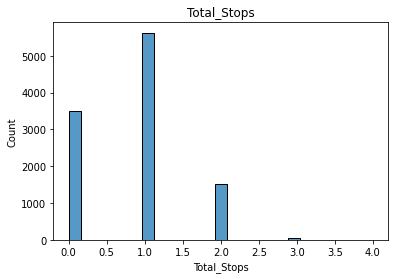

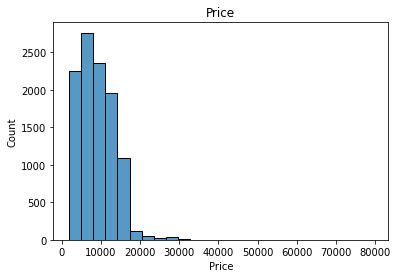

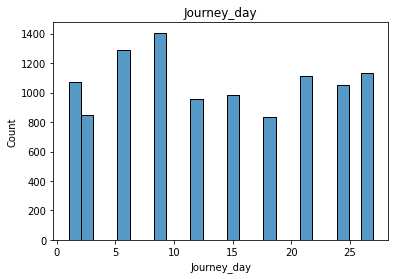

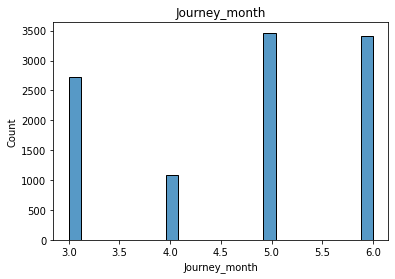

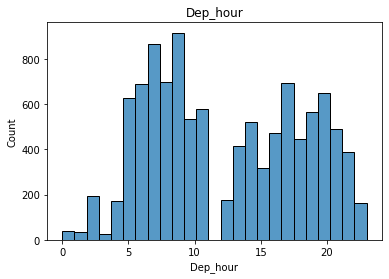

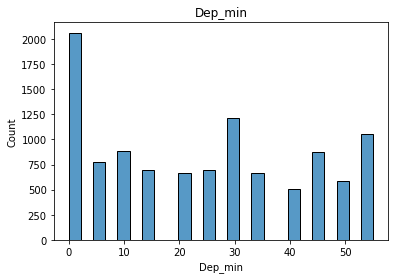

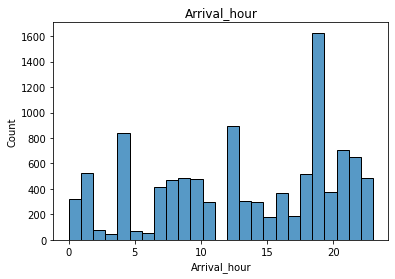

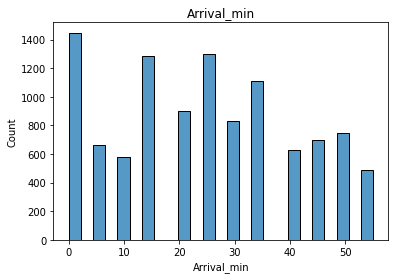

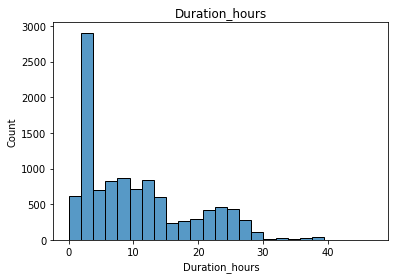

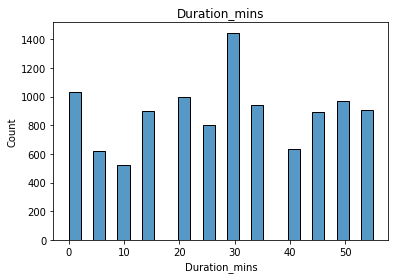

In [71]:
for feature in num_cols:
    data =dataset.copy()
    #data[feature].hist(bins=25)
    sns.histplot(x=feature,data=data,bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

We will apply Standardization to all above feature directly

In [72]:
dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
dataset_norm_reg.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Feature Selection

#### 1. Multivariate Selection - Correlation Matrix

Correlation between all Independent Features and Dependent Feature

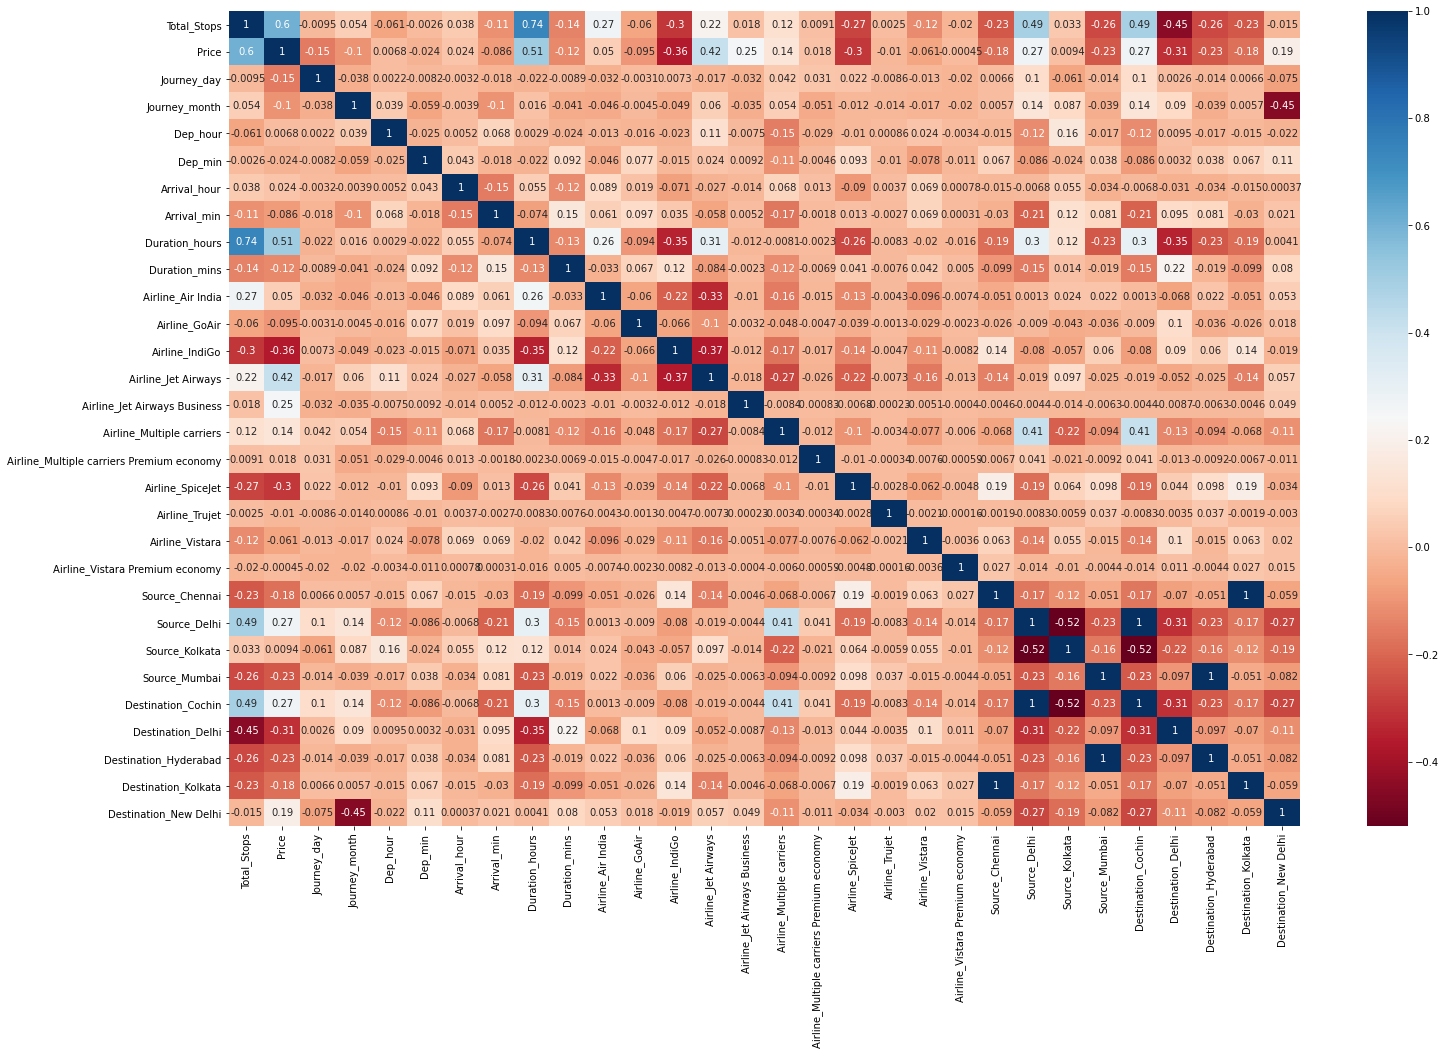

In [77]:
plt.figure(figsize=(24, 15))
sns.heatmap(dataset.corr(),annot=True,cmap='RdBu')
plt.show()

Visualizing Each Feature with Dependent Feature in better way

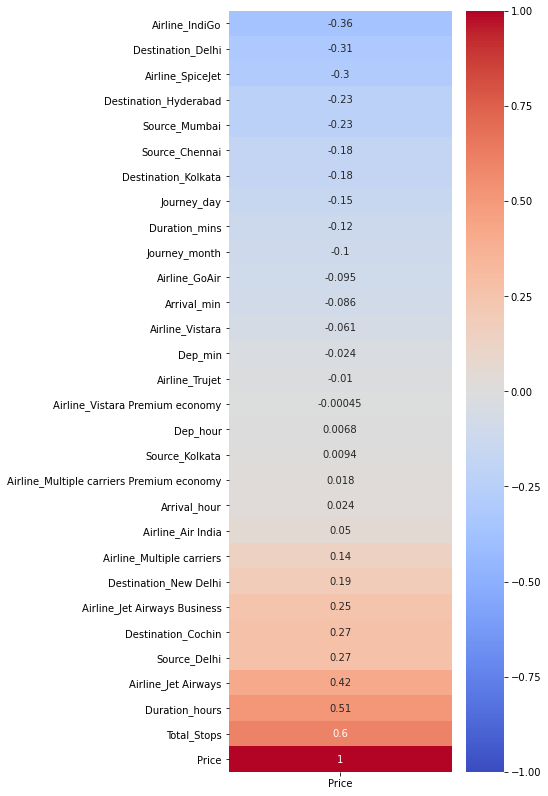

In [79]:
plt.figure(figsize=(5, 14))
sns.heatmap(dataset.corr()[['Price']].sort_values(by='Price'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

#### Correlation betweeen Independet Features

In [80]:
dataset_only_independent = dataset.copy()
dataset_only_independent = dataset_only_independent.drop(['Price'],axis=1)
dataset_only_independent.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


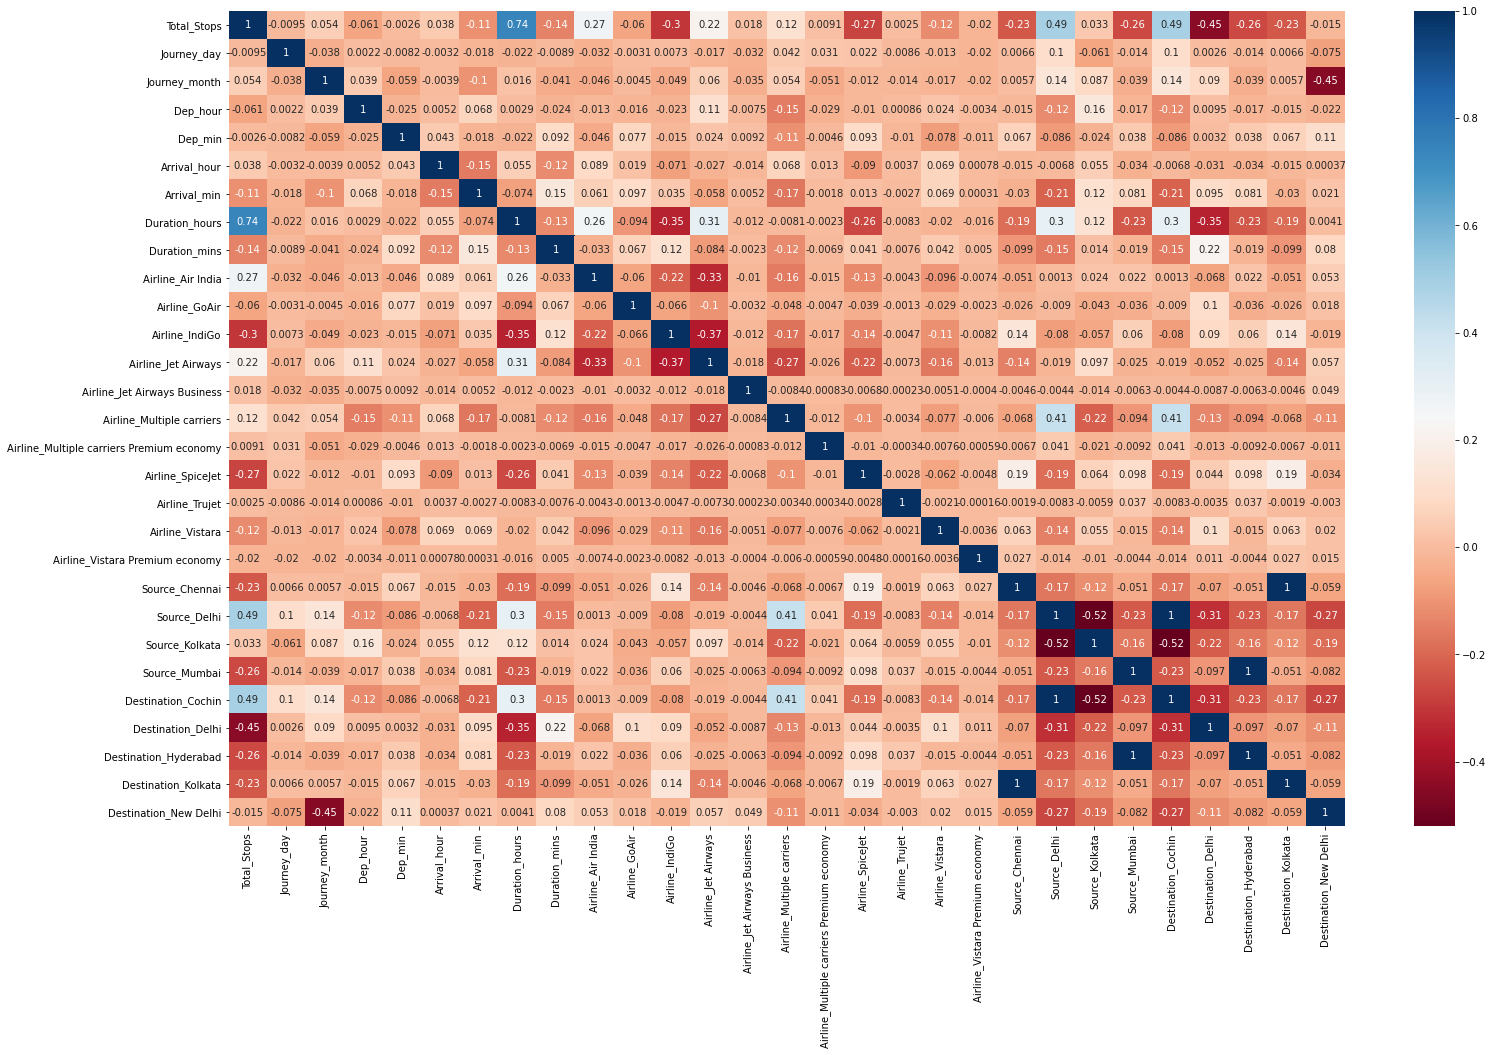

In [82]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset_only_independent.corr(),annot=True,cmap='RdBu')
plt.show()

### Now we will remove One Feature , If two independent features are highly correlated 

Now we will create a function which will take Independent features and remove those which have > threshold values

Following function will select highly correlated features and it will remove first feature that is highle correlated with another feature

In [83]:
def high_correlation_train_set_indpendent(dataset,threshold):
    col_corr = set() #Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # It also consider -ve corr - You can remove abs() - If you dont wont to consider -ve corr
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

### These function return correlated features which are to be removed , Becaause they are correlated with any other feature

In [84]:
corr_features = high_correlation_train_set_indpendent(dataset_only_independent,0.8)
corr_features

{'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'}

From Above Result , We can say that Destination Cochin,Hydrebad and kolkata' is high correlated with some other feature i-e Source Chennai,Delhi,Mumbai . So we can remove any one feature from above two .

Before Removing any Features , We will verify it with some other Feature Importance techniques


##### Feature Selection/Importance Techniques

For now, we have a rough idea of variables that are positively and negatively correlated with the target feature. To make final decision, which variables from highly correlated we will use for our model, we need to access the strength of the "true" correlation between predictors

#### 1. Extra Trees Classifier Technique - Feature Importance

In [85]:
y_og_values = dataset['Price']
y_og_values.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [89]:
model_feature_Selection = ExtraTreesRegressor()
model_feature_Selection.fit(dataset_only_independent,y_og_values)
print(model_feature_Selection.feature_importances_)

[2.18985853e-01 1.42571874e-01 5.37340985e-02 2.41769967e-02
 2.13397473e-02 2.80336164e-02 1.94681308e-02 1.28213439e-01
 1.78655998e-02 1.08892087e-02 1.69046397e-03 1.72019322e-02
 1.42074646e-01 6.77296290e-02 1.91474373e-02 9.02315650e-04
 2.68409415e-03 1.18605562e-04 5.31460550e-03 8.68469562e-05
 6.24510845e-04 9.64815695e-03 3.41808151e-03 6.98466926e-03
 1.28385137e-02 1.40528046e-02 5.06757149e-03 5.08465333e-04
 2.46280860e-02]


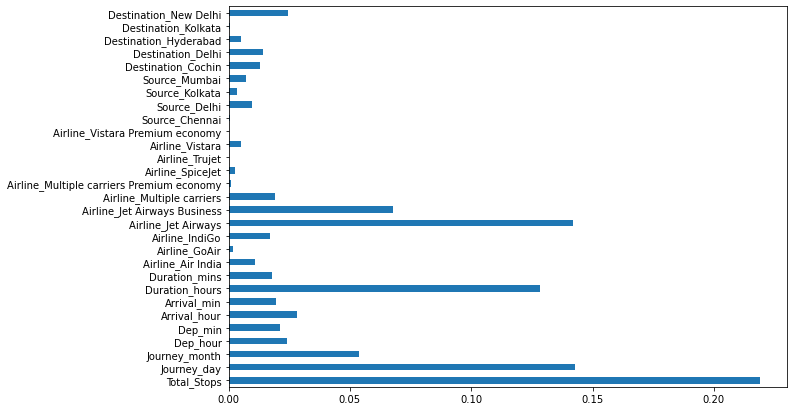

In [92]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_feature_Selection.feature_importances_, index=dataset_only_independent.columns)
fig=plt.figure(figsize=[10,7])
feat_importances.plot(kind='barh')
plt.show()

Removing Variables that are not imporatant as per our analysis

In [96]:
X = dataset_only_independent.copy()
y = y_og_values.copy()

### X norm ref dataframe will consist of all our feature engineering,Feature transformation,Feature Importance step
X_norm_reg = dataset_only_independent.copy()
y_norm_reg = y_og_values.copy()

#### We will compare our Analysis and Original dataset when applying algorithms
display(X.head())
display(X_norm_reg.head())
display(y.head())
display(y_norm_reg.head())

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

Now we will remove corr independent features which we got in Correlation matrix

In [97]:
X_norm_reg = X_norm_reg.drop(['Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'],axis=1)
X_norm_reg.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
print(X.shape)
print(X_norm_reg.shape)

(10682, 29)
(10682, 26)


### Model Building 

Train Test Split

In [101]:
X_train_norm_reg, X_test_norm_reg, y_train_norm_reg, y_test_norm_reg = train_test_split(X_norm_reg, y_norm_reg, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('For Norm Reg : ' , X_train_norm_reg.shape, X_test_norm_reg.shape, y_train_norm_reg.shape, y_test_norm_reg.shape)
print('For Ensemble : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

For Norm Reg :  (8545, 26) (2137, 26) (8545,) (2137,)
For Ensemble :  (8545, 29) (2137, 29) (8545,) (2137,)


Standard Scaling 

In [102]:
sc = StandardScaler()
X_train_st_norm_reg = sc.fit_transform(X_train_norm_reg)
X_test_st_norm_reg = sc.transform(X_test_norm_reg)

#### Model Building on Dataset which is not scaled and no feature Selection is done on that 

In [107]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Linear Regression': [LinearRegression()],
    'Lasso' :[Lasso()],
    'Ridge' :[Ridge()],
    'KNN' :[KNeighborsRegressor()],
    'Decision Tree' :[DecisionTreeRegressor()],
    'Support Vector Regression':[SVR()],
    'Random Forest' :[RandomForestRegressor()],
    'Gradient Boosting':[GradientBoostingRegressor()],
    'XG Boost': [XGBRegressor(objective='reg:squarederror')],
    'LGBM':[LGBMRegressor()],
    'Cat Boost':[CatBoostRegressor(verbose=0, n_estimators=100)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators, X_train, y_train)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted


In [108]:
#applying the fitted models to the test dataset
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        outcome[m] = [round(metrics.r2_score(y_test, y_pred), 2), 
                      metrics.mean_absolute_error(y_test, y_pred),
                     
                     metrics.mean_squared_error(y_test, y_pred),
                     np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    return outcome

outcome = mpredict(estimators, X_test, y_test)

In [109]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Linear Regression------------------------
R2 score 0.6
MAE 1953.75
MSE 8210080.68
RMSE 2865.32
------------------------Lasso------------------------
R2 score 0.6
MAE 1951.52
MSE 8185858.52
RMSE 2861.09
------------------------Ridge------------------------
R2 score 0.6
MAE 1950.84
MSE 8121561.2
RMSE 2849.84
------------------------KNN------------------------
R2 score 0.59
MAE 1853.79
MSE 8363522.34
RMSE 2891.98
------------------------Decision Tree------------------------
R2 score 0.67
MAE 1395.54
MSE 6796830.71
RMSE 2607.07
------------------------Support Vector Regression------------------------
R2 score -0.0
MAE 3493.0
MSE 20528514.31
RMSE 4530.84
------------------------Random Forest------------------------
R2 score 0.81
MAE 1210.41
MSE 3896972.07
RMSE 1974.07
------------------------Gradient Boosting------------------------
R2 score 0.75
MAE 1544.21
MSE 5133561.62
RMSE 2265.74
------------------------XG Boost------------------------
R2 score 0.75
MAE 1544.26

### Saving all above models

In [111]:
for m in estimators:

  # open a file, where you ant to store the data
  file = open(m+'_model.pkl', 'wb')

  # dump information to that file
  pickle.dump(estimators[m][0], file)

### Model Building on Scaled Data

In [112]:
mfit(estimators, X_train_st_norm_reg, y_train_norm_reg)
outcome = mpredict(estimators, X_test_st_norm_reg, y_test_norm_reg)

### Outcome output
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted
Decision Tree fitted
Support Vector Regression fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted
------------------------Linear Regression------------------------
R2 score 0.6
MAE 1953.97
MSE 8210746.03
RMSE 2865.44
------------------------Lasso------------------------
R2 score 0.6
MAE 1952.98
MSE 8208559.13
RMSE 2865.06
------------------------Ridge------------------------
R2 score 0.6
MAE 1953.66
MSE 8209883.79
RMSE 2865.29
------------------------KNN------------------------
R2 score 0.73
MAE 1466.95
MSE 5515367.49
RMSE 2348.48
------------------------Decision Tree------------------------
R2 score 0.64
MAE 1395.16
MSE 7332279.39
RMSE 2707.82
------------------------Support Vector Regression------------------------
R2 score 0.05
MAE 3344.58
MSE 19410179.72
RMSE 4405.7
------------------------Random Forest------------------------
R2 score 0.81
MAE 1214.09
MSE 3923138.84
RMSE 19

There is not much change in R2 scaore when we applied Feature Scaling and Removed 3 features 

So we will be using all features for model building

#### Hyper Parameter Optimization

#### Random Forest

In [116]:
#Randomized Search CV

reg_rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [117]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [120]:
prediction = rf_random.predict(X_test)
print('R2 Score:',round(metrics.r2_score(y_test, prediction), 2))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2 Score: 0.82
MAE: 1176.9548717888388
MSE: 3642850.8442409527
RMSE: 1908.6253808018357


In [121]:
reg_rf_hypertuned = RandomForestRegressor(max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=15,n_estimators=700)
reg_rf_hypertuned = reg_rf_hypertuned.fit(X_train,y_train)

prediction = reg_rf_hypertuned.predict(X_test)
print('R2 Score:',round(metrics.r2_score(y_test, prediction), 2))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2 Score: 0.82
MAE: 1176.7678091952685
MSE: 3649082.319073282
RMSE: 1910.2571342814774


In [122]:
file = open('random_forest_hypertuned.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf_hypertuned, file)

#### Ensemble Technique - Combining Multiple Models

In [123]:
rf=RandomForestRegressor()
xg=XGBRegressor(objective='reg:squarederror')
gbm=GradientBoostingRegressor()
lgbm=LGBMRegressor()
catboost=CatBoostRegressor(verbose=0, n_estimators=100)

Ens = VotingRegressor( 
    estimators= [('RandomForestRegressor',rf),('XGBRegressor',xg),('GBM',gbm),('Lgbm',lgbm),('Catboost',catboost)])

## Training the Ensemble learning:
Ens= Ens.fit(X_train , y_train)

pred = Ens.predict(X_test)
print("R2 score =", round(metrics.r2_score(y_test, pred), 2))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

#Accuracy of Ensemble learning:
print('Accuracy score of Ensemble Learning is = {:.2f}'.format(Ens.score(X_test, y_test)),'%')

R2 score = 0.82
MAE: 1304.1392744447162
MSE: 3751375.06403526
RMSE: 1936.84668057006
Accuracy score of Ensemble Learning is = 0.82 %


In [124]:
file = open('Combined_model_without_scaling.pkl', 'wb')

# dump information to that file
pickle.dump(Ens, file)

#### Combined Model With Scaling

In [125]:
rf=RandomForestRegressor()
xg=XGBRegressor(objective='reg:squarederror')
gbm=GradientBoostingRegressor()
lgbm=LGBMRegressor()
catboost=CatBoostRegressor(verbose=0, n_estimators=100)

Ens = VotingRegressor( 
    estimators= [('RandomForestRegressor',rf),('XGBRegressor',xg),('GBM',gbm),('Lgbm',lgbm),('Catboost',catboost)])

## Training the Ensemble learning:
Ens= Ens.fit(X_train_st_norm_reg , y_train_norm_reg)

pred = Ens.predict(X_test_st_norm_reg)
print("R2 score =", round(metrics.r2_score(y_test_norm_reg, pred), 2))
print('MAE:', metrics.mean_absolute_error(y_test_norm_reg, pred))
print('MSE:', metrics.mean_squared_error(y_test_norm_reg, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_norm_reg, pred)))

#Accuracy of Ensemble learning:
print('Accuracy score of Ensemble Learning is = {:.2f}'.format(Ens.score(X_test_st_norm_reg, y_test_norm_reg)),'%')

R2 score = 0.82
MAE: 1300.989838894525
MSE: 3754976.081299911
RMSE: 1937.77606582905
Accuracy score of Ensemble Learning is = 0.82 %


So Even if we are combining multiple models or Doing Feature Scaing and Removing unwanted features , Our Model accuracy is 82% Highest in Random Forest hyper parameter tuned without scaled model . Also this models has lowest values in MAE,MSE,RMSE


We will use that only 

#### Loading the Saved model and Using that for New Test Set

In [126]:
model = open('random_forest_hypertuned.pkl','rb')
forest = pickle.load(model)

y_pred_final = forest.predict(X_test)
print('R2 Score:',round(metrics.r2_score(y_test, y_pred_final), 2))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_final))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_final))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_final)))

R2 Score: 0.82
MAE: 1176.7678091952685
MSE: 3649082.319073282
RMSE: 1910.2571342814774


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


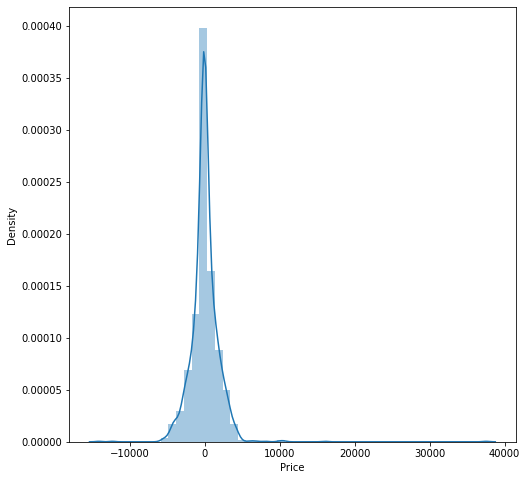

In [128]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_pred_final)
plt.show()

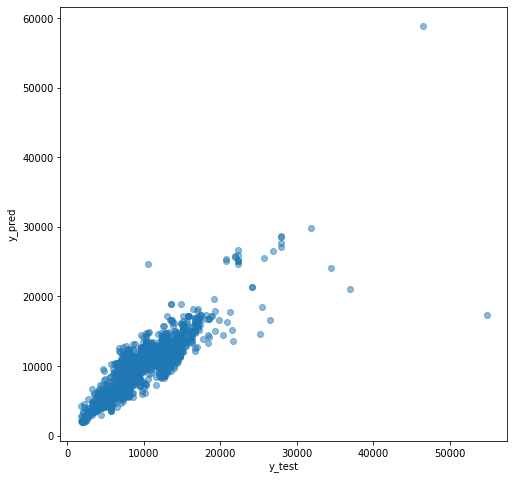

In [129]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred_final, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()